# Digit

## Setup

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

dataObj = load_digits()
X = dataObj.data
y = dataObj.target
colsX = dataObj.feature_names
df = pd.DataFrame(X, columns=colsX)
print(df.shape)
display(df.head())

(1797, 64)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


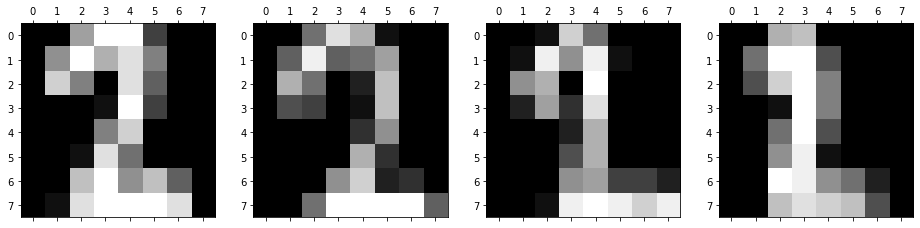

In [6]:
digit = 2
num_fig = 4

# Get index 
idxs = (y == digit).nonzero()[0]

# Get random sample
idxs_rand = np.random.choice(idxs,num_fig)

# Plot
fig, axs = plt.subplots(1, num_fig, figsize=(4*num_fig,4))
plt.gray()
for n, idx in enumerate(idxs_rand):
    axs[n].matshow(X[idx,:].reshape(8,8))

# Dimensionality reduction with PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [30]:
n_components = 64
pca = PCA(n_components=n_components)
pca.fit(X_std)

PCA(n_components=64)

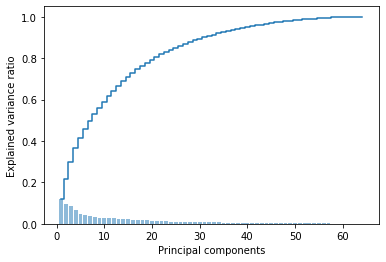

In [33]:
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [36]:
X_std_pca = PCA(n_components=2).fit_transform(X_std)

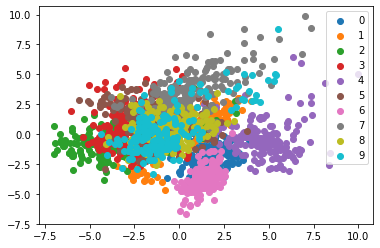

In [46]:
fig, ax = plt.subplots()
for l in np.unique(y):
    ax.scatter(X_std_pca[y == l, 0], X_std_pca[y == l, 1], label=l)
ax.legend()

# Dimensionality reduction with LDA

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

n_components = 9
lda = LDA(n_components=n_components)
lda.fit(X_std, y)

LinearDiscriminantAnalysis(n_components=9)

In [61]:
lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

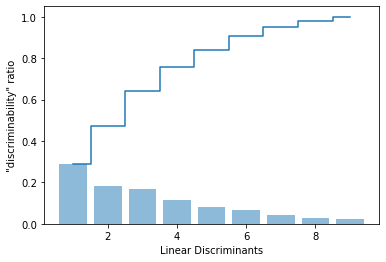

In [64]:
plt.bar(range(1, n_components+1), lda.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, n_components+1), np.cumsum(lda.explained_variance_ratio_), where='mid')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.show()

In [66]:
X_std_lda = LDA(n_components=2).fit_transform(X_std, y)

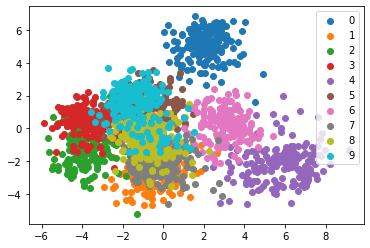

In [67]:
fig, ax = plt.subplots()
for l in np.unique(y):
    ax.scatter(X_std_lda[y == l, 0], X_std_lda[y == l, 1], label=l)
ax.legend()

# Dimensionality reduction with KPCA

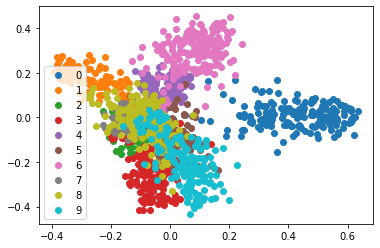

In [80]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)

X_std_pca = kpca.fit_transform(X_std)

fig, ax = plt.subplots()
for l in np.unique(y):
    ax.scatter(X_std_pca[y == l, 0], X_std_pca[y == l, 1], label=l)
ax.legend()

# Visualization with TSNE

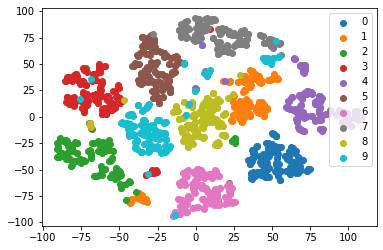

In [82]:
from sklearn.manifold import TSNE
scikit_tsne = TSNE(n_components=2, perplexity=5, learning_rate=300, init='pca')
X_std_tsne = scikit_tsne.fit_transform(X_std)

fig, ax = plt.subplots()
for l in np.unique(y):
    ax.scatter(X_std_tsne[y == l, 0], X_std_tsne[y == l, 1], label=l)
ax.legend()

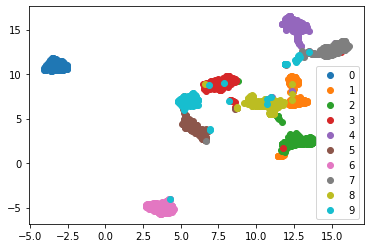

In [85]:
from umap import UMAP 
umap = UMAP(n_neighbors=15)
X_std_umap  = umap.fit_transform(X_std)
fig, ax = plt.subplots()
for l in np.unique(y):
    ax.scatter(X_std_umap[y == l, 0], X_std_umap[y == l, 1], label=l)
ax.legend()